This is an analysis of crude oil production, export, and import data compiled in the UN's Energy Statistics Database. The data is annualized from 1990 to 2015.

http://data.un.org/Data.aspx?d=EDATA&f=cmID%3aCR

We will analyze the temporal trends of global production and country-specific production, exports, and imports.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Data was initially downloaded piecemeal (production, export, & import), but could be downloaded as one filed
oil_prod = pd.read_csv('UN_oilprod_data.csv')
oil_export = pd.read_csv('UN_oilexport_data.csv')
oil_import = pd.read_csv('UN_oilimport_data.csv')

#Revise column names
oil_prod.columns = ['Country', 'Conventional crude oil production', 'Year', 'Unit', 'Quantity', 'Footnote']
oil_export.columns = ['Country', 'Conventional crude oil exports', 'Year', 'Unit', 'Quantity', 'Footnote']
oil_import.columns = ['Country', 'Conventional crude oil imports', 'Year', 'Unit', 'Quantity', 'Footnote']

In [4]:
#Convert Thousand metric tons to barrels of oil, assuming 30 API oil gravity
oil_prod['Barrels'] = oil_prod['Quantity'] * 1000 * ((2204.623 / 7.297) / 42)
oil_export['Barrels'] = oil_export['Quantity'] * 1000 * ((2204.623 / 7.297) / 42)
oil_import['Barrels'] = oil_import['Quantity'] * 1000 * ((2204.623 / 7.297) / 42)

Let's first start by looking at production data as that's the most well known piece of this data set.  I would argue that most people could guess the top few oil producing countries relatively easily, while the top exporters/importers would probably be more opaque.

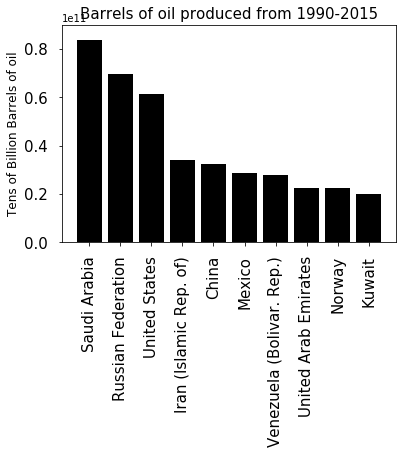

In [27]:
#Sum all production over the 1990-2015 time frame by country
prod_by_country = oil_prod.groupby('Country')['Barrels'].sum()

ten_biggest_producers = prod_by_country.nlargest(10, 'first')

plt.bar(ten_biggest_producers.index, ten_biggest_producers, color='black')
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=15, pad=10)
plt.ylim(0, 90000000000)
plt.ylabel('Tens of Billion Barrels of oil', size=12)
plt.title('Barrels of oil produced from 1990-2015', size=15)
plt.show()

See, that's a fairly intuitive top 10 list.  You've got a number of Middle Eastern countries: Saudi Arabia, Iran, UAE, and Kuwait.  Russia and the US are top dogs, too.  And finally the top 10 rounds off with a number of other countries that produced between 20-30 billion barrels in 25 years.  Wait...billion with a 'B'!  Wow, that's a massive amount of oil.  

As you may have known previously, this list has been, and likely will continue to be, a massive driver in global geopolitics.  Saudi Arabia and it's Middle Eastern neighbors produce oceans of oil which gives them an outsized influence on geopolitics and commodity prices.  Saudi Arabia alone produced more than it's three biggest neighbors.  Russia's oil production dominance over Europe drives some (most?) of it's politcal power.  Rounding out the top 3 is the US, which doesn't necessarily rely on the production to sway other countries, but, as we'll see later, this production very much powers some domestic politics, trends, and cultural behaviors.

Now let's take a look at the temporal production trends of these countries.  For clarity, we'll only look at the top 5 producers.

In [6]:
#annual global production
annual_global_prod = oil_prod.groupby('Year')['Barrels'].sum()

#annual production by country
saudi_prod = oil_prod.loc[oil_prod['Country'] == 'Saudi Arabia']
annual_saudi_prod = saudi_prod.groupby('Year')['Barrels'].sum()
annual_saudi_percent_global = (annual_saudi_prod / annual_global_prod) * 100

russia_prod = oil_prod.loc[oil_prod['Country'] == 'Russian Federation']
annual_russia_prod = russia_prod.groupby('Year')['Barrels'].sum()
annual_russia_percent_global = (annual_russia_prod / annual_global_prod) * 100

us_prod = oil_prod.loc[oil_prod['Country'] == 'United States']
annual_us_prod = us_prod.groupby('Year')['Barrels'].sum()
annual_us_percent_global = (annual_us_prod / annual_global_prod) * 100

iran_prod = oil_prod.loc[oil_prod['Country'] == 'Iran (Islamic Rep. of)']
annual_iran_prod = iran_prod.groupby('Year')['Barrels'].sum()
annual_iran_percent_global = (annual_iran_prod / annual_global_prod) * 100

china_prod = oil_prod.loc[oil_prod['Country'] == 'China']
annual_china_prod = china_prod.groupby('Year')['Barrels'].sum()
annual_china_percent_global = (annual_china_prod / annual_global_prod) * 100

mexico_prod = oil_prod.loc[oil_prod['Country'] == 'Mexico']
annual_mexico_prod = mexico_prod.groupby('Year')['Barrels'].sum()
annual_mexico_percent_global = (annual_mexico_prod / annual_global_prod) * 100

ven_prod = oil_prod.loc[oil_prod['Country'] == 'Venezuela (Bolivar. Rep.)']
annual_ven_prod = ven_prod.groupby('Year')['Barrels'].sum()
annual_ven_percent_global = (annual_ven_prod / annual_global_prod) * 100

uae_prod = oil_prod.loc[oil_prod['Country'] == 'United Arab Emirates']
annual_uae_prod = uae_prod.groupby('Year')['Barrels'].sum()
annual_uae_percent_global = (annual_uae_prod / annual_global_prod) * 100

norway_prod = oil_prod.loc[oil_prod['Country'] == 'Norway']
annual_norway_prod = norway_prod.groupby('Year')['Barrels'].sum()
annual_norway_percent_global = (annual_norway_prod / annual_global_prod) * 100

kuwait_prod = oil_prod.loc[oil_prod['Country'] == 'Kuwait']
annual_kuwait_prod = kuwait_prod.groupby('Year')['Barrels'].sum()
annual_kuwait_percent_global = (annual_kuwait_prod / annual_global_prod) * 100


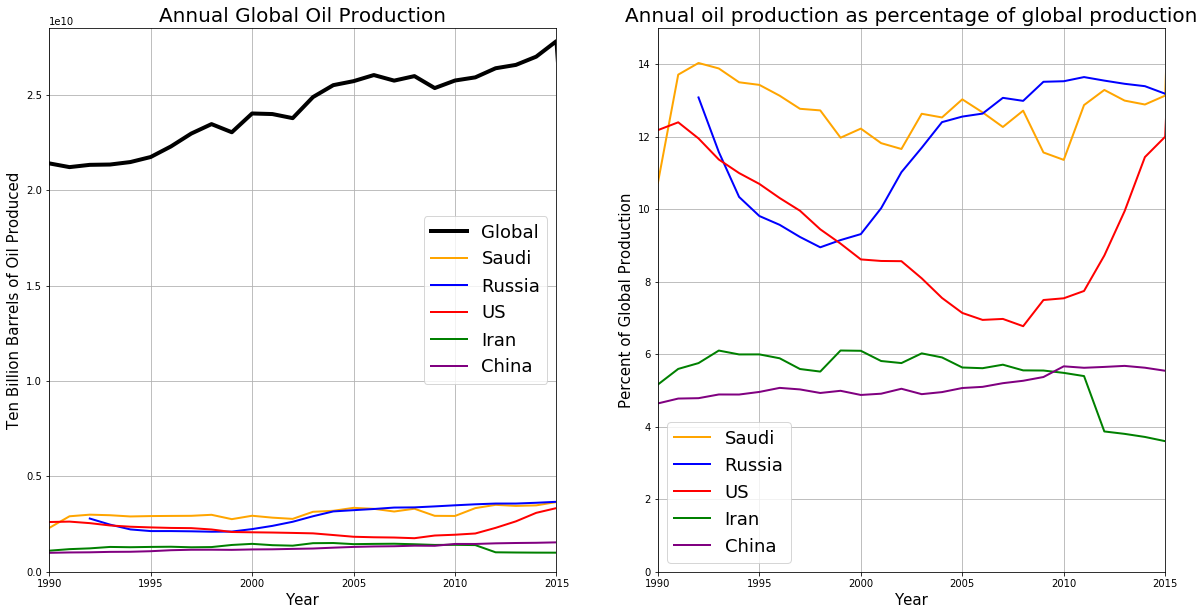

In [28]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.plot(annual_global_prod, color='black', linewidth=4)
plt.plot(annual_saudi_prod, color='orange', linewidth=2)
plt.plot(annual_russia_prod, color='blue', linewidth=2)
plt.plot(annual_us_prod, color='red', linewidth=2)
plt.plot(annual_iran_prod, color='green', linewidth=2)
plt.plot(annual_china_prod, color='purple', linewidth=2)
plt.legend(('Global', 'Saudi', 'Russia', 'US', 'Iran', 'China'), loc='best', fontsize=18)
plt.xlabel('Year', size=15)
plt.ylabel('Ten Billion Barrels of Oil Produced', size=15)
plt.title('Annual Global Oil Production', size=20)
plt.ylim(0,28500000000)
plt.xlim(1990,2015)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(annual_saudi_percent_global, color='orange', linewidth=2)
plt.plot(annual_russia_percent_global, color='blue', linewidth=2)
plt.plot(annual_us_percent_global, color='red', linewidth=2)
plt.plot(annual_iran_percent_global, color='green', linewidth=2)
plt.plot(annual_china_percent_global, color='purple', linewidth=2)
plt.legend(('Saudi', 'Russia', 'US', 'Iran', 'China'), loc='best', fontsize=18)
plt.xlabel('Year', size=15)
plt.ylabel('Percent of Global Production', size=15)
plt.title('Annual oil production as percentage of global production', size=20)
plt.ylim(0,15)
plt.xlim(1990,2015)
plt.grid(True)

plt.tight_layout
plt.show()

Here we've plotted two graphs side-by-side -- a look at the global production on the left and a zoom-in of the country-specific data on the right.

First you'll see that annual global oil production has fairly continuously increased by over 5 billion barrels from 1990 to 2015.  The trends of the top 5 producing countries hasn't been that dramatic.  It seems like the global increase hasn't really been attributed to these countries.  Perhaps Russia from 2000-2004 and the US from 2011-2015 account for a good chunk of the global increase, but definitely not all of it. Let's look at the country-specific production plot on the right to see if that holds true.

A couple of interesting trends jump out to us on this plot which shows the annual share of global production attributible to a given country.  Starting at the top and working down, Saudi Arabia's global market share has generally been between 12 and 14 percent, though they were on a downward trend through 2010.  Russia has ridden one heck of a production roller coaster.  Note that Russia's data doesn't begin until 1992 because it didn't exist as a country until the dissolution of the USSR in late 1991.  It's production fell rapidly following that event, but started to recover in nearly reverse fasion before becoming the global leader from 2006 to 2015.  The US saw a similar, but slower, decline from prominence before fracking and unconventional technologies spearheaded a dramatic turnaround.  China appears to have maintained a steady-ish 5% market share.  And finally, Iran maintained a roughly 6% market share before the US imposed sanctions on Iranian oil in 2012.

That's an interesting look at production trends, now let's take a look at export and import trends to see where all that oil is going.

In [8]:
#Get cumulative exports & imports by country
export_by_country = oil_export.groupby('Country')['Barrels'].sum()
import_by_country = oil_import.groupby('Country')['Barrels'].sum()

#Get top 10 lists of exporters & importers
ten_biggest_exporters = export_by_country.nlargest(10)
ten_biggest_importers = import_by_country.nlargest(10)

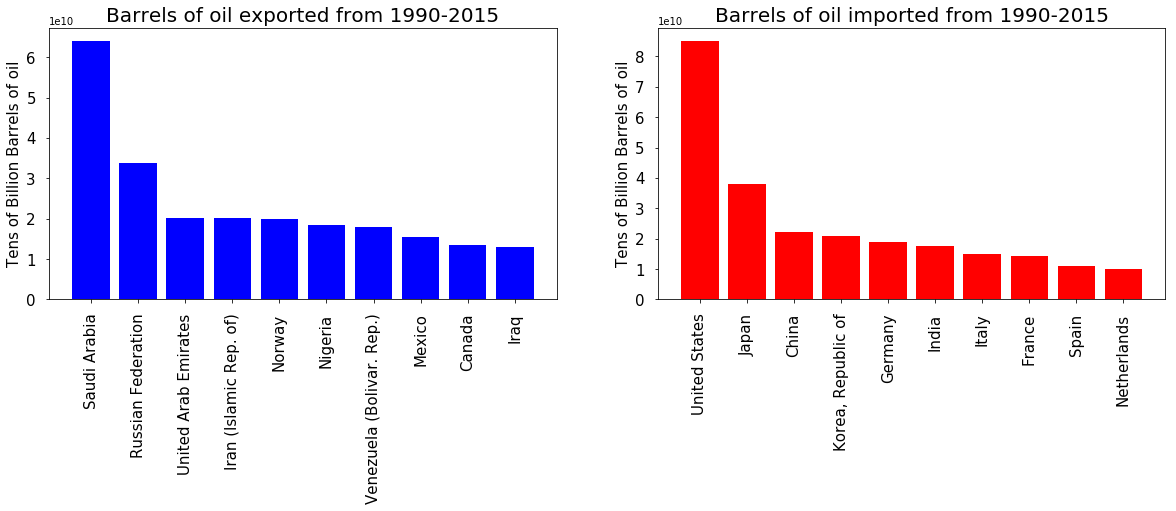

In [29]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(ten_biggest_exporters.index, ten_biggest_exporters, color='blue')
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=15, pad=10)
plt.ylabel('Tens of Billion Barrels of oil', size=15)
plt.title('Barrels of oil exported from 1990-2015', size=20)

plt.subplot(1,2,2)
plt.bar(ten_biggest_importers.index, ten_biggest_importers, color='red')
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=15, pad=10)
plt.ylabel('Tens of Billion Barrels of oil', size=15)
plt.title('Barrels of oil imported from 1990-2015', size=20)

plt.show()

Well that the list of top exporters sure looks a lot like the top producer list.  You've got lots of OPEC member states and most of the other top 10 producers.  But, where's the US?  The US was the third biggest producer!  Maybe the US wants to 'energy independent' and keeps most of the produced oil for itself?

If that's the case though, why does the US import the most oil?  Over 80 billion barrels from 1990 to 2015.  That's more oil imported than the next 3 countries combined! We'll come back to the weird dynamics at play within the US in a second.  

But first let's discuss the rest of the top importer list.  Most of these countries are devoid of domestic oil reserves and rely on the imports to fuel their own industries.  Interestingly, while most of the countries on this list are well-developed, the rapidly developing China and India are also here.  

Now on to the US situation.

In [10]:
#Pulling out the annual US imports and exports
us_import = oil_import.loc[oil_import['Country'] == 'United States']
annual_us_import = us_import.groupby('Year')['Barrels'].sum()

us_export = oil_export.loc[oil_export['Country'] == 'United States']
annual_us_export = us_export.groupby('Year')['Barrels'].sum()

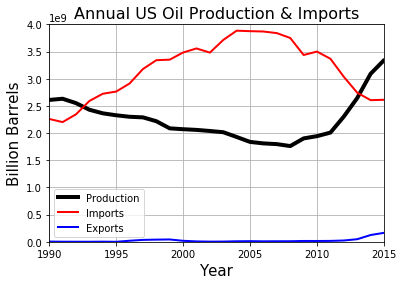

In [33]:
plt.plot(annual_us_prod, color='black', linewidth=4)
plt.plot(annual_us_import, color='red', linewidth=2)
plt.plot(annual_us_export, color='blue', linewidth=2)
plt.xlabel('Year', size=15)
plt.ylabel('Billion Barrels', size=15)
plt.title('Annual US Oil Production & Imports', size=16)
plt.ylim(0,4000000000)
plt.xlim(1990,2015)
plt.grid(True)
plt.legend(('Production', 'Imports', 'Exports'), loc='best')
plt.show()

Ok, so to recap what we've learned above.  The US is a big oil producer that lost global market share before rebounding quickly, is also the largest oil importer, and is somewhere below the top 10 oil exporters.

If we look at American production, imports, and exports plotted together, the story becomes a little clearer.  Production and imports are inversely correlated.  As domestic oil production declined from 2.5 billion barrels annually to ~1.75 billion barrels in 2007, oil imports increased from 2.2 to nearly 4 billion barrels.  Exports are miniscule, declining from ~200 million barrels in 1990 to ~20 million in 2015.

Why are American oil exports so low?  The easy answer is that it's complicated and this plot doesn't tell the whole story.  In the 1970's the US faced an oil embargo from OPEC member states which prompted congress to pass legislation making the export of most crude oil illegal.  However, refined petroleum products like gasoline, diesel, and jet fuel remained legal. This law remained on the books until late 2015.

The fact that US oil production and imports are inversely correlated suggests that there is a base need which must be met.  We'll come back to this thought in a bit, but first let's compare the production/import/export trends of some of the other big name countries.

In [12]:
#Pulling out the annual imports & exports of Russia, Saudi Arabia, and China
russia_import = oil_import.loc[oil_import['Country'] == 'Russian Federation']
annual_russia_import = russia_import.groupby('Year')['Barrels'].sum()

russia_export = oil_export.loc[oil_export['Country'] == 'Russian Federation']
annual_russia_export = russia_export.groupby('Year')['Barrels'].sum()

saudi_import = oil_import.loc[oil_import['Country'] == 'Saudi Arabia']
annual_saudi_import = saudi_import.groupby('Year')['Barrels'].sum()

saudi_export = oil_export.loc[oil_export['Country'] == 'Saudi Arabia']
annual_saudi_export = saudi_export.groupby('Year')['Barrels'].sum()

china_import = oil_import.loc[oil_import['Country'] == 'China']
annual_china_import = china_import.groupby('Year')['Barrels'].sum()

china_export = oil_export.loc[oil_export['Country'] == 'China']
annual_china_export = china_export.groupby('Year')['Barrels'].sum()

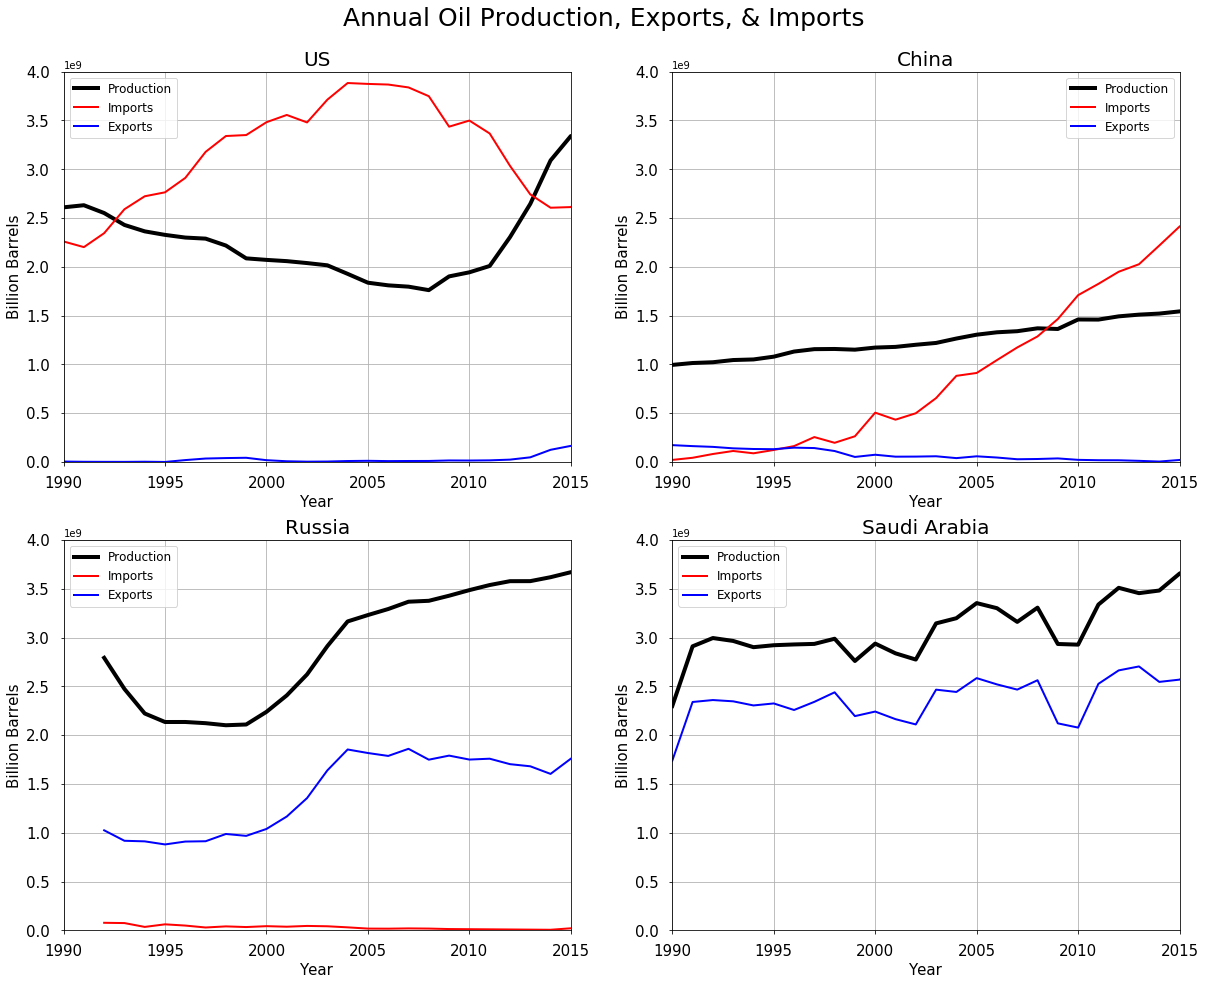

In [13]:
#Plotting 4 comparison plots of annual production, imports, and exports
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
plt.plot(annual_us_prod, color='black', linewidth=4)
plt.plot(annual_us_import, color='red', linewidth=2)
plt.plot(annual_us_export, color='blue', linewidth=2)
plt.xlabel('Year', size=15)
plt.ylabel('Billion Barrels', size=15)
plt.title('US', size=20)
plt.ylim(0,4000000000)
plt.xlim(1990,2015)
plt.grid(True)
plt.tick_params(labelsize=15, pad=10)
plt.legend(('Production', 'Imports', 'Exports'), loc='best', fontsize=12)

plt.subplot(2,2,2)
plt.plot(annual_china_prod, color='black', linewidth=4)
plt.plot(annual_china_import, color='red', linewidth=2)
plt.plot(annual_china_export, color='blue', linewidth=2)
plt.xlabel('Year', size=15)
plt.ylabel('Billion Barrels', size=15)
plt.title('China', size=20)
plt.ylim(0,4000000000)
plt.xlim(1990,2015)
plt.grid(True)
plt.tick_params(labelsize=15, pad=10)
plt.legend(('Production', 'Imports', 'Exports'), loc='best', fontsize=12)

plt.subplot(2,2,3)
plt.plot(annual_russia_prod, color='black', linewidth=4)
plt.plot(annual_russia_import, color='red', linewidth=2)
plt.plot(annual_russia_export, color='blue', linewidth=2)
plt.xlabel('Year', size=15)
plt.ylabel('Billion Barrels', size=15)
plt.title('Russia', size=20)
plt.ylim(0,4000000000)
plt.xlim(1990,2015)
plt.grid(True)
plt.tick_params(labelsize=15, pad=10)
plt.legend(('Production', 'Imports', 'Exports'), loc='best', fontsize=12)

plt.subplot(2,2,4)
plt.plot(annual_saudi_prod, color='black', linewidth=4)
plt.plot(annual_saudi_import, color='red', linewidth=2)
plt.plot(annual_saudi_export, color='blue', linewidth=2)
plt.xlabel('Year', size=15)
plt.ylabel('Billion Barrels', size=15)
plt.title('Saudi Arabia', size=20)
plt.ylim(0,4000000000)
plt.xlim(1990,2015)
plt.grid(True)
plt.tick_params(labelsize=15, pad=10)
plt.legend(('Production', 'Imports', 'Exports'), loc='best', fontsize=12)


plt.suptitle('Annual Oil Production, Exports, & Imports', size=25)
#plt.tight_layout
plt.subplots_adjust(top=.92)
plt.show()

Here we have the annual oil production, export, and inport trends for the US, China, Russia, and Saudi Arabia.  We just described the US trends above, let's now compare to these other countries.  

China's production growth has been slow and steady and it's limited oil exports have basically stopped.  Conversely, it's imports have risen dramatically from nothing to 2.5 billion barrels of oil per year in 2015.  Russia's imports have never been more than a trickle.  The strong correlation between oil production and exports from 1992 to 2004 suggest that Russia was acting to meet a healthy international demand while the inverse correlation from 2004 onwards indicate the demand was met and Russia kept a moderate production growth for domestic use.  Saudi Arabia, awash in oil, has never needed to import any and it's domestic demand has been relatively flat.  The impressively correlated production and export trend indicates that Saudi Arabia is closely in-tune with the international market demand.  And this is most definitely the case -- Saudi Arabia, as a member of OPEC, has always acted as a "swing producer".  Meaning that whenever it was decided (by OPEC) the international market needed more or less oil, it was Saudi Arabia who would control the flow.

We've briefly discussed the implied domestic oil demand for these countries, so why don't we look at this further.  The basic premise here is that domestic demand is equal to production plus imports minus exports.  Obviously, this isn't perfect but it is a good first approximation.

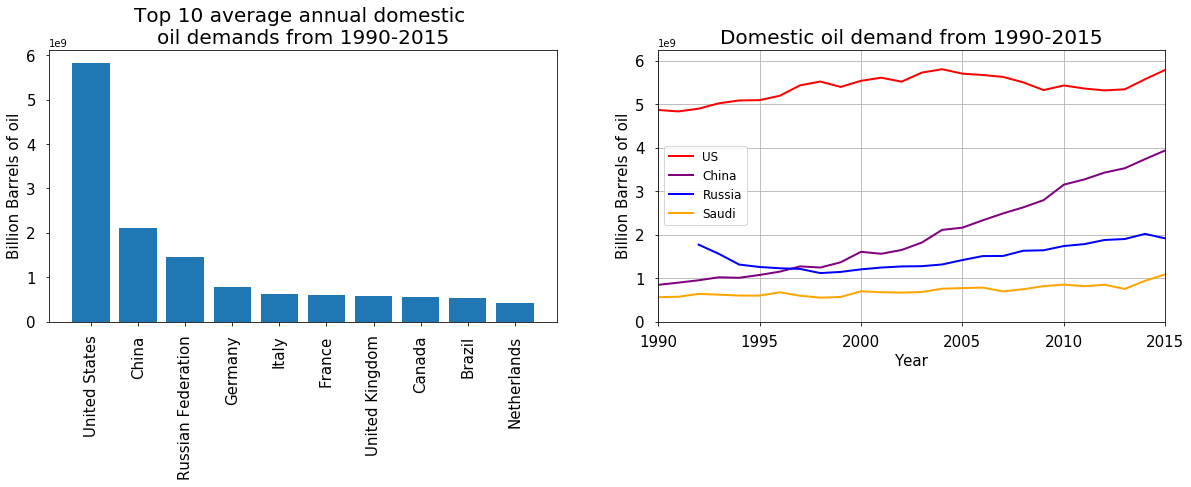

In [14]:
#Define domestic demand as production plus imports minus exports, averaged annually
oil_needs = (prod_by_country + import_by_country - export_by_country) / 25
ten_neediest_countries = oil_needs.nlargest(10)

#Computing annual domestic demand for US, China, Russia, and Saudi Arabia
us_oil_needs = annual_us_prod + annual_us_import - annual_us_export
china_oil_needs = annual_china_prod + annual_china_import - annual_china_export
russia_oil_needs = annual_russia_prod - annual_russia_export #Import data was not complete and negligible
saudi_oil_needs = annual_saudi_prod - annual_saudi_export #Saudi Arabia didn't import any oil


plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(ten_neediest_countries.index, ten_neediest_countries)
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=15, pad=10)
plt.ylabel('Billion Barrels of oil', size=15)
plt.title('Top 10 average annual domestic \noil demands from 1990-2015', size=20)

plt.subplot(1,2,2)
plt.plot(us_oil_needs, color='r', linewidth=2)
plt.plot(china_oil_needs, color='purple', linewidth=2)
plt.plot(russia_oil_needs, color='b', linewidth=2)
plt.plot(saudi_oil_needs, color='orange', linewidth=2)
plt.ylim(0, 6250000000)
plt.xlim(1990, 2015)
plt.ylabel('Billion Barrels of oil', size=15)
plt.xlabel('Year', size=15)
plt.tick_params(labelsize=15, pad=10)
plt.title('Domestic oil demand from 1990-2015', size=20)
plt.legend(('US', 'China', 'Russia', 'Saudi'), loc='best', fontsize=12)
plt.grid(True)

plt.tight_layout
plt.show()

So, as expected the US domestic oil demand is vastly greater than any other country.  And once again, this is probably driven by the law banning crude oil exports.  The rest of the top 10 countries are all well-developed industrial nations.

The annual trends for the US, China, Russia, and Saudi are all generally increasing -- though Saudi increased the least and Chinese domestic demand has increased the most.  In fact, China's oil demand has increased by about 200 million barrels per year since the early 2000s.  

To wrap up, we'll take a look at a summary plot of production versus exports.

In [15]:
#Merging the disparate dataframes into one
#Inner joins will drop entries with no data, so only those countries
#with production, export, and inport data will survive
prod_export = pd.merge(oil_prod, oil_export, how='inner', on=('Country', 'Year'))
prod_export_import = pd.merge(prod_export, oil_import, how='inner', on=('Country', 'Year'))

prod_export_import.columns = ['Country', 
                              'Production', 
                              'Year', 
                              'Unit_x', 
                              'MT Prod', 
                              'Footnote_x', 
                              'Barrels Produced', 
                              'Exports', 
                              'Unit_y', 
                              'Quantity_y', 
                              'Footnote_y', 
                              'Barrels Exported', 
                              'imports', 
                              'Unit', 
                              'Quantity', 
                              'Footnote', 
                              'Barrels imported'
]

#Sum barrels per country in data set
oil_importers = prod_export_import.groupby('Country')['Barrels imported'].sum()
oil_exporters = prod_export_import.groupby('Country')['Barrels Exported'].sum()
oil_producers = prod_export_import.groupby('Country')['Barrels Produced'].sum()


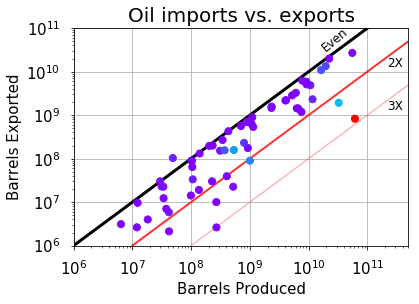

In [16]:
#Marker color variable
oil_imports = oil_importers.values 

plt.scatter(oil_producers, oil_exporters, c=oil_imports, s=50, cmap='rainbow', zorder=3)
plt.plot([0, 1000000000000], [0, 1000000000000], 'k', lw=3, zorder=2)
plt.plot([10000000, 1000000000000], [1000000, 100000000000], 'red', lw=2, alpha=0.8, zorder=2)
plt.plot([100000000, 1000000000000], [1000000, 10000000000], 'red', lw=1, alpha=0.4, zorder=2)
plt.xscale('log')
plt.xlim(1000000, 500000000000)
plt.xlabel('Barrels Produced', size=15)
plt.yscale('log')
plt.ylim(1000000, 100000000000)
plt.ylabel('Barrels Exported', size=15)
plt.title('Oil imports vs. exports', size=20)
plt.annotate('Even', (15000000000, 70000000000), rotation=40, size=12, zorder=4)
plt.annotate('2X', (220000000000, 13000000000), size=12, zorder=4)
plt.annotate('3X', (220000000000, 1300000000), size=12, zorder=4)
plt.tick_params(labelsize=15, pad=10)
plt.grid(True, zorder=0)
plt.show()

Finally, here's a comparison plot of oil produced and exported.  Marker color reflects oil imported with hotter colors indicating more imports.  There is a strong, positive, linear correlation between amount of oil produced and exported, as one might have imagined.  The domestic demand is visualized here by distance away from the x=y line.  Generally, the less oil a country produces the more it keeps for itself and conversely, the more oil it produces the less it keeps for itself. 